# Predicting Housing Price Using Neural Network [Tensorflow  and Keras]


Real DB from Kaggle (https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)

2014-15 Home Sales in King County, WA, one of three Washington counties that are included in the Seattle metropolitan area.

DB Dictionary (https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/)


----------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kc_house_data.csv')




# EAD - Exploratory Data Analysis

----------------


In [3]:
df.isnull().sum()

#there is no missing data

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<AxesSubplot:xlabel='price', ylabel='Count'>

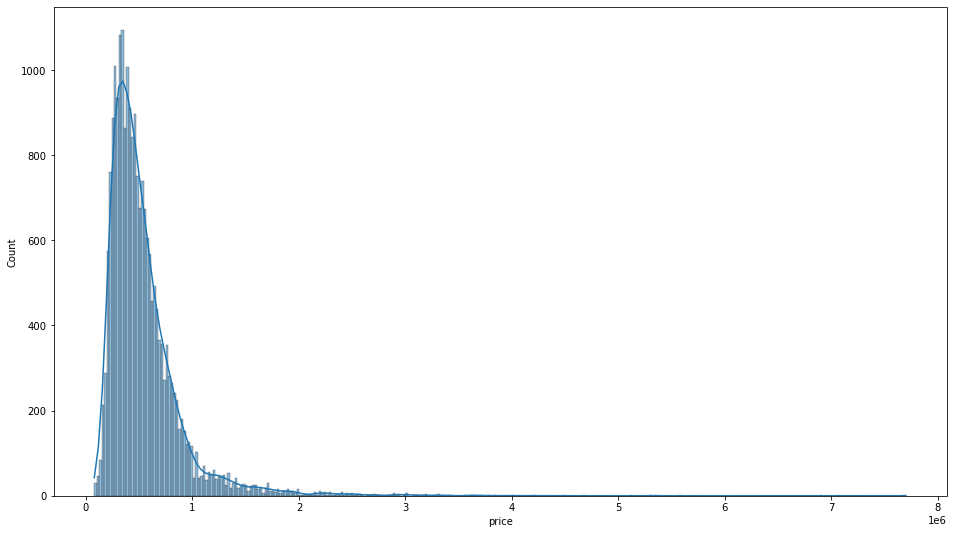

In [6]:
plt.figure(figsize=(16,9))
sns.histplot(df['price'],kde=True)

#Probably we can predict very well the house price between 0 and 2 million dolars. We can exclude the outliers.

In [7]:
#Exploring posible correlations.

df.corr()['price'].sort_values()

#Seems that the price is very correlated with sqft_living feature

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

In [8]:
#plt.figure(figsize=(16,9))
#sns.pairplot(df)

#We can see the same correlation on the pairplot and with others faetures. 
#But price and sqft_living is really correlated.

#Not showing it here beacause its not a good way to see in pairplot with a lot of attributes, the plots got very small.

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

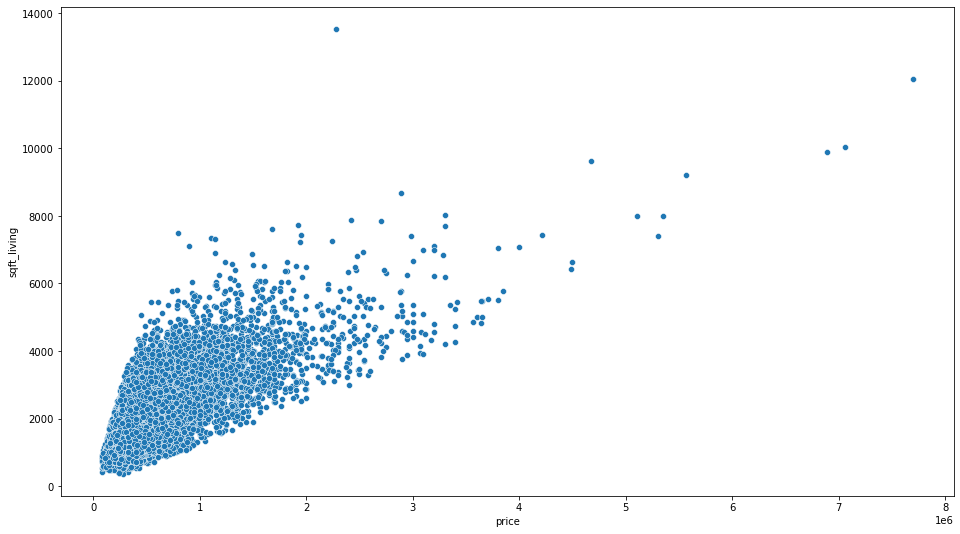

In [9]:
#let´s see that correlation closely

plt.figure(figsize=(16,9))
sns.scatterplot(data=df,x='price',y='sqft_living')

<AxesSubplot:xlabel='price', ylabel='bathrooms'>

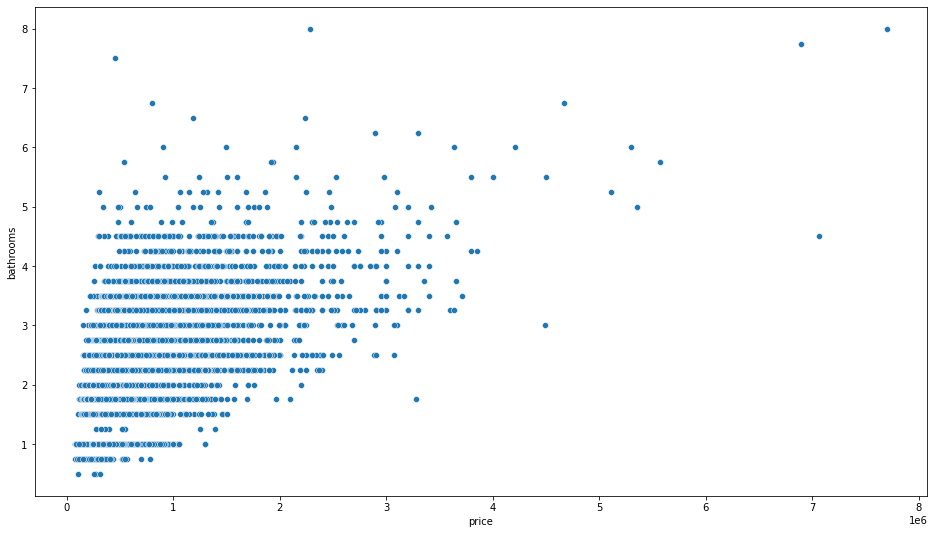

In [10]:
#Other correlations

plt.figure(figsize=(16,9))
sns.scatterplot(data=df,x='price',y='bathrooms')

<AxesSubplot:xlabel='price', ylabel='sqft_above'>

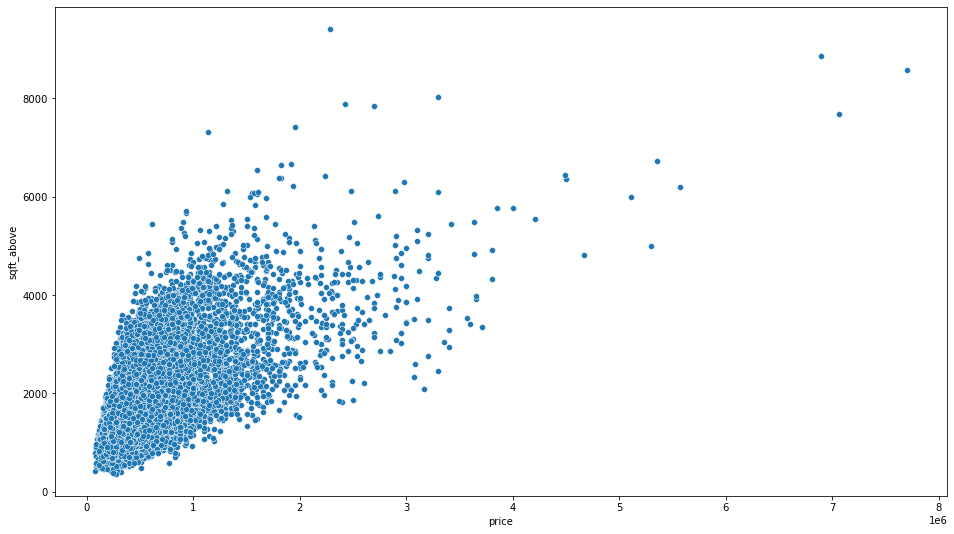

In [11]:
#Other correlations

plt.figure(figsize=(16,9))
sns.scatterplot(data=df,x='price',y='sqft_above')

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

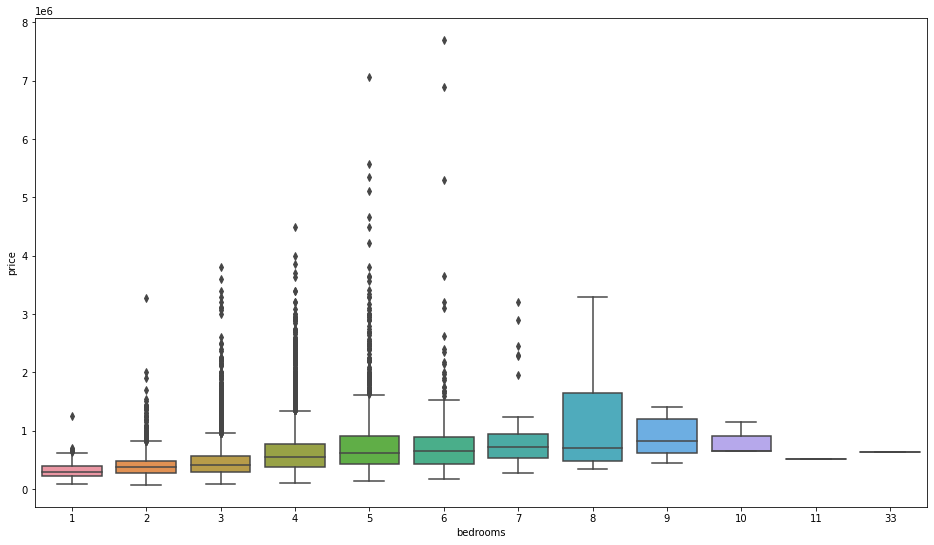

In [12]:
#Distributions of price per number of bedrooms

plt.figure(figsize=(16,9))
sns.boxplot(data=df,x='bedrooms',y='price')

<AxesSubplot:xlabel='price', ylabel='long'>

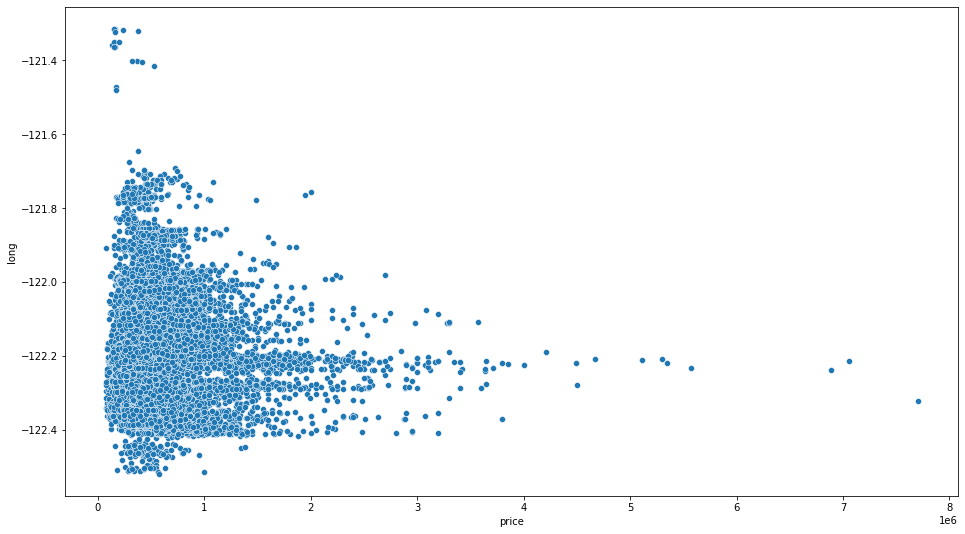

In [13]:
#Using lat (latitude) and long (longitude feature) to build
    # a King County's map and check if that interfere s
    # on the house prices

plt.figure(figsize=(16,9))
sns.scatterplot(data=df,x='price',y='long')

<AxesSubplot:xlabel='price', ylabel='lat'>

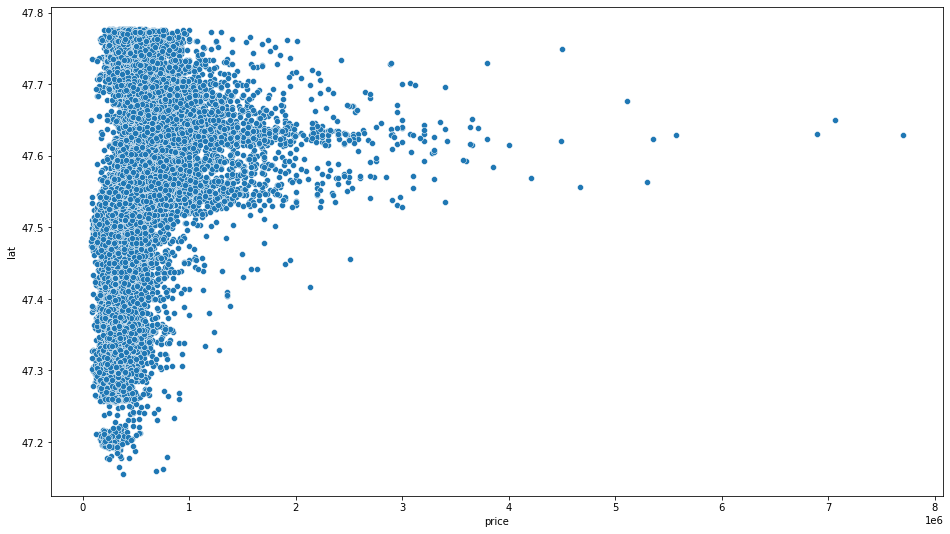

In [14]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=df,x='price',y='lat')

#looks like yes, the place interferes on the house price as expected

<AxesSubplot:xlabel='long', ylabel='lat'>

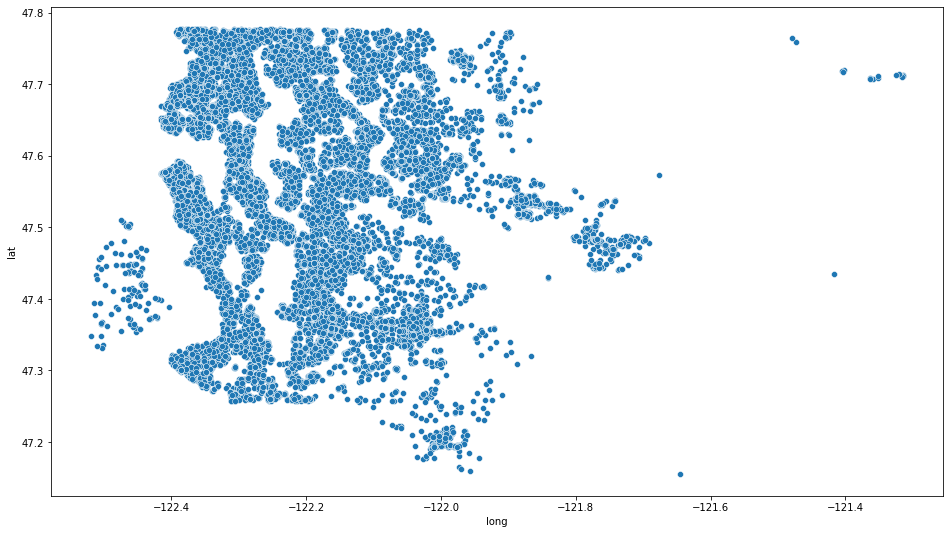

In [15]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=df,x='long',y='lat')

#This scatterplot almost match the King County map

<AxesSubplot:xlabel='long', ylabel='lat'>

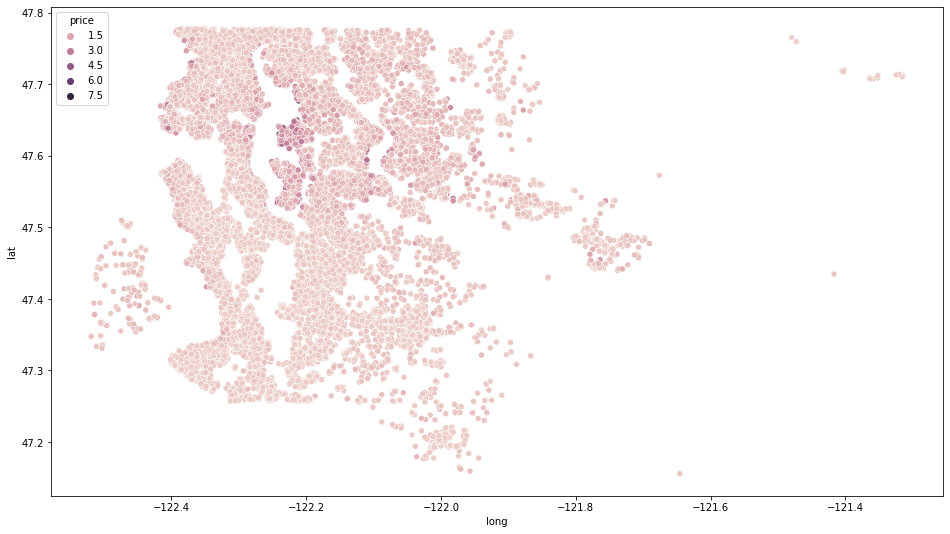

In [16]:
#Color according prices

plt.figure(figsize=(16,9))
sns.scatterplot(data=df,x='long',y='lat',hue='price')

#The outliers are not let us see very well the colormap

In [17]:
#Let's drop 1% of the house/prices (the outliers)

len(df)*0.01

215.97

In [18]:
df_99perc = df.sort_values('price',ascending=False).iloc[216:]

<AxesSubplot:xlabel='long', ylabel='lat'>

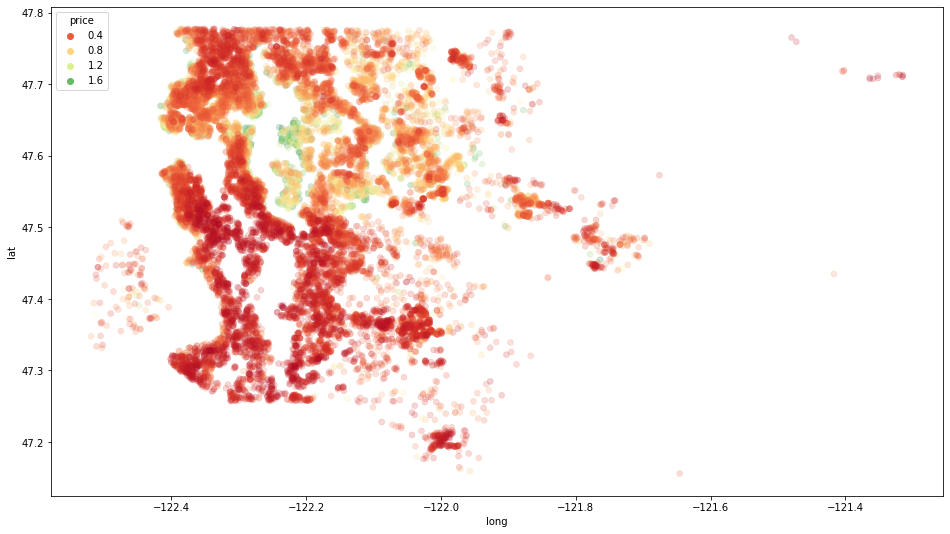

In [19]:
#Plotting again

plt.figure(figsize=(16,9))
sns.scatterplot(data=df_99perc,x='long',y='lat',hue='price',
               edgecolor=None, alpha=0.2, palette='RdYlGn')

#Red less expensive
#Green more expensive

<AxesSubplot:xlabel='waterfront', ylabel='price'>

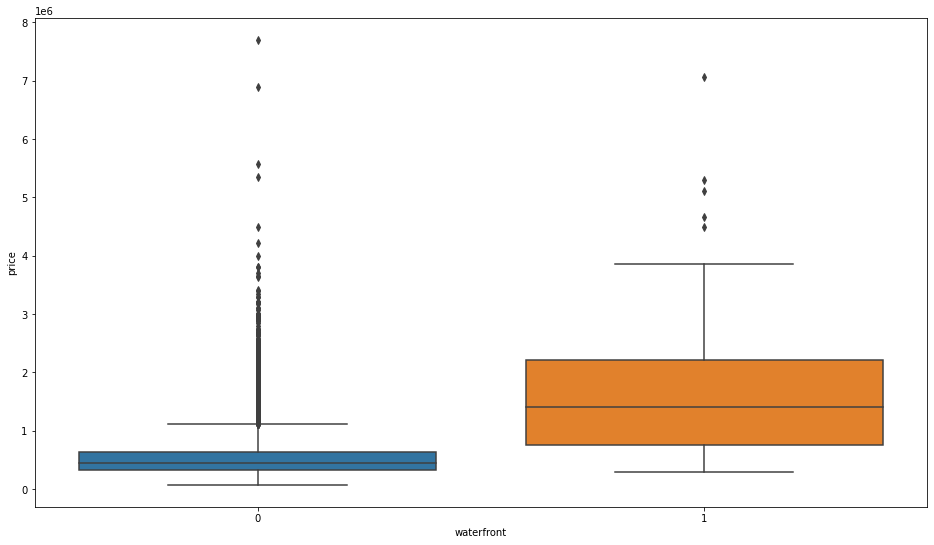

In [20]:
#Water front feature and prices

plt.figure(figsize=(16,9))
sns.boxplot(data=df,x='waterfront',y='price')

#1 = is water front
#0 = is not water front

#If is waterfront then is more expensive

# Feature Engineering Process

Transformming the most relevant variables from raw data to improve the performance of machine learning (ML) algorithms.

------------

In [21]:
#Lets drop feature that is not important to us 
#And use just 99% of the data (taking out those outliers)

df_99perc = df.drop('id',axis=1)

In [26]:
df_99perc['date']

#date is object

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [27]:
#converting to datetime object

df_99perc['date'] = pd.to_datetime(df_99perc['date'])

In [28]:
df_99perc['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [29]:
#Creating two new columns to see if 
    #there is some useful feature on datetime

df_99perc['year'] = df_99perc['date'].apply(lambda date: date.year)
df_99perc['month'] = df_99perc['date'].apply(lambda date: date.month)

In [30]:
df_99perc = df_99perc.drop('date',axis=1)

In [31]:
df_99perc.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<AxesSubplot:xlabel='month'>

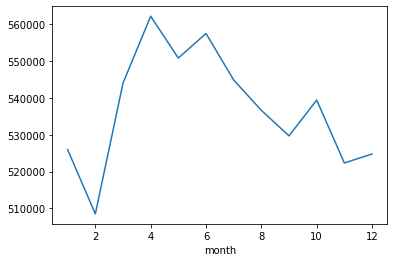

In [32]:
#There is some influence in which month do we sell the property?

df_99perc.groupby('month').mean()['price'].plot()

#A litle influence yes

<AxesSubplot:xlabel='year'>

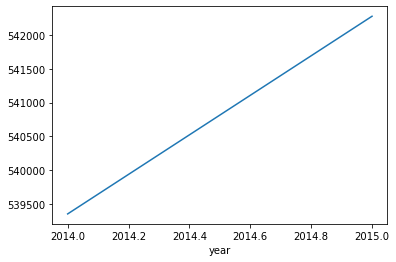

In [33]:
df_99perc.groupby('year').mean()['price'].plot()

#The prices go up one year after other, what makes sense

In [34]:
#Let´s drop the zipcode too because it's not logical distributted
    #and we already have latitude and longitude

df_99perc = df_99perc.drop('zipcode',axis=1)

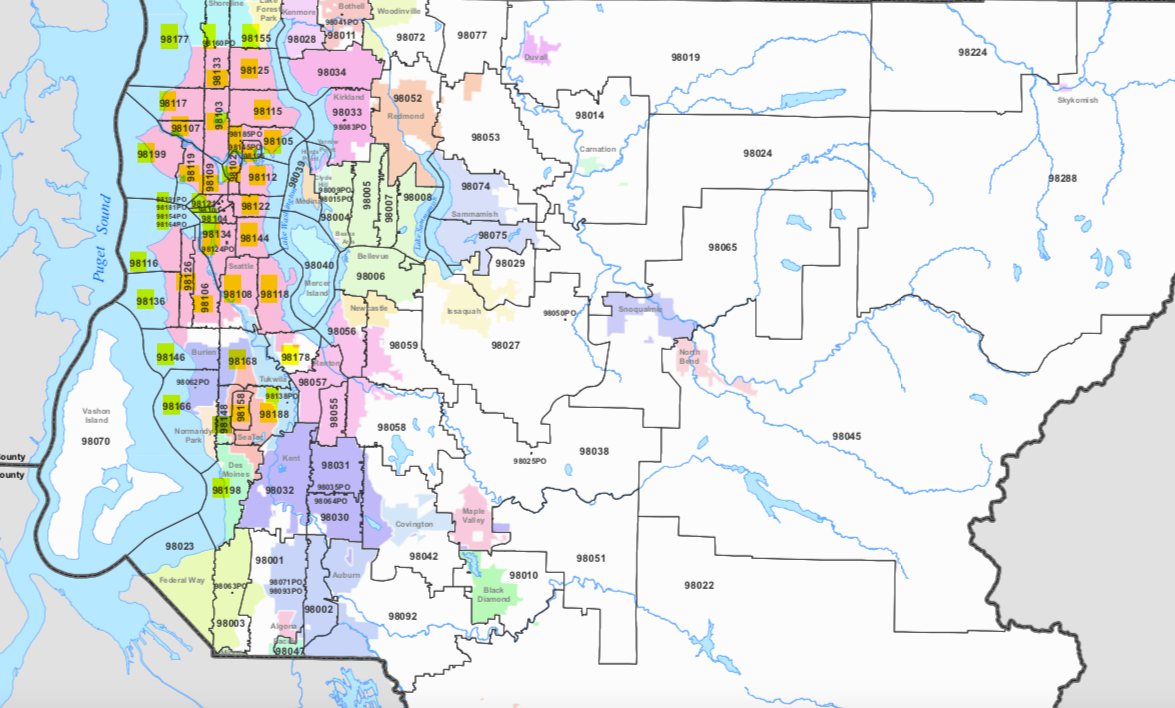

# Train & Test Model

-------------

In [35]:
#Splitting the data

X = df_99perc.drop('price',axis=1).values
y = df_99perc['price'].values

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [38]:
#Scaling the data (always just on X)

from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()

In [40]:
X_train = scaler.fit_transform(X_train)

In [41]:
X_test = scaler.transform(X_test)

# Creating a deep learning model 

With Tensorflow and Keras

-----------------

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [43]:
X_train.shape

(15117, 19)

In [46]:
#Let´s use 19 neurons per layer 

model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu')) #A Rectified Linear Unit (relu) function returns 0 if it receives a negative input, 
                                        #and if it receives a positive value, the function will return back the same positive value.

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

#Adam optimization is a stochastic gradient descent method beacuse it 'combine' the benefits of 
#AdaGrad (Adaptive Gradient Algorithm) and RMSProp (Root Mean Square Propagation).

ReLu function:

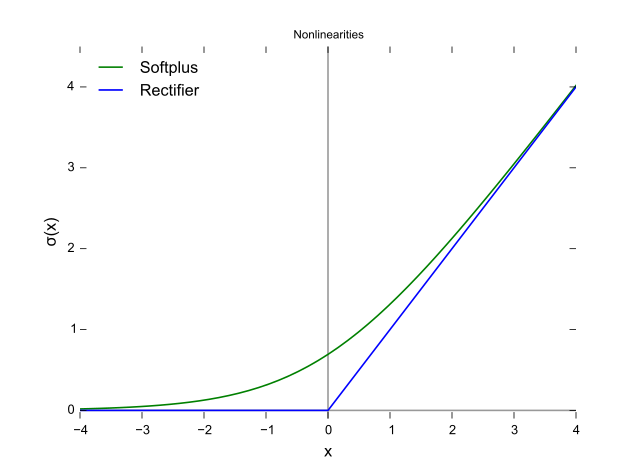

In [47]:
#Trainning our model

model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
         batch_size=128,
         epochs=400,
         verbose=0) 

# important: don't worry, validation doesn't actually change de test data.

# Evaluating the Model

-----------------

In [48]:
#history of the calculated losses

model.history.history

{'loss': [430235648000.0,
  428763283456.0,
  408378966016.0,
  313179930624.0,
  156117516288.0,
  99731169280.0,
  96727277568.0,
  94986215424.0,
  93232783360.0,
  91426897920.0,
  89560104960.0,
  87597146112.0,
  85576990720.0,
  83435814912.0,
  81295794176.0,
  78980939776.0,
  76566118400.0,
  74097598464.0,
  71526014976.0,
  68972208128.0,
  66422001664.0,
  63866572800.0,
  61514625024.0,
  59286511616.0,
  57304612864.0,
  55581274112.0,
  54124593152.0,
  52835749888.0,
  51805908992.0,
  50851606528.0,
  50024579072.0,
  49273311232.0,
  48623329280.0,
  47947206656.0,
  47347134464.0,
  46768967680.0,
  46216388608.0,
  45690654720.0,
  45206085632.0,
  44729786368.0,
  44327854080.0,
  43885670400.0,
  43532926976.0,
  43149176832.0,
  42787024896.0,
  42461360128.0,
  42123055104.0,
  41853300736.0,
  41569222656.0,
  41315639296.0,
  41035837440.0,
  40815079424.0,
  40560848896.0,
  40305340416.0,
  40100237312.0,
  39796187136.0,
  39555411968.0,
  39298748416.0,
 

In [49]:
#putting it in a df to compare

pd.DataFrame(model.history.history)

,loss,val_loss
0,4.302356e+11,4.188866e+11
1,4.287633e+11,4.137970e+11
2,4.083790e+11,3.674646e+11
3,3.131799e+11,2.215630e+11
4,1.561175e+11,1.030742e+11
...,...,...
395,2.894613e+10,2.648978e+10
396,2.890225e+10,2.645366e+10
397,2.893609e+10,2.662629e+10
398,2.890178e+10,2.645349e+10


<AxesSubplot:>

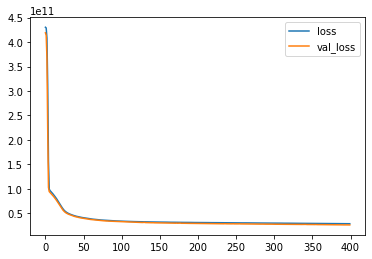

In [50]:
#plotting that df

losses = pd.DataFrame(model.history.history)
losses.plot()

#this is the perfect behaviour we desire to see

# Predicting

--------------------

In [51]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [52]:
pred = model.predict(X_test)

203/203 [==============================] - 1s 3ms/step


In [53]:
pred

array([[432760.72],
       [586596.44],
       [575481.7 ],
       ...,
       [406132.4 ],
       [597030.94],
       [683578.3 ]], dtype=float32)

In [54]:
#RMSE

np.sqrt(mean_squared_error(y_test,pred))

162532.95927484107

In [55]:
#MAE

mean_absolute_error(y_test,pred)

100852.6434148341

In [60]:
df_99perc['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [57]:
5.402966e+05

#mean of the house prices = 540.000
#RMSE = 163.000
#MAE = 101.000

#meaning are model is predicting with 18-20% of error, not good

540296.6

In [58]:
#how much of the variance is explained by our model

explained_variance_score(y_test,pred)

0.8008035596774933

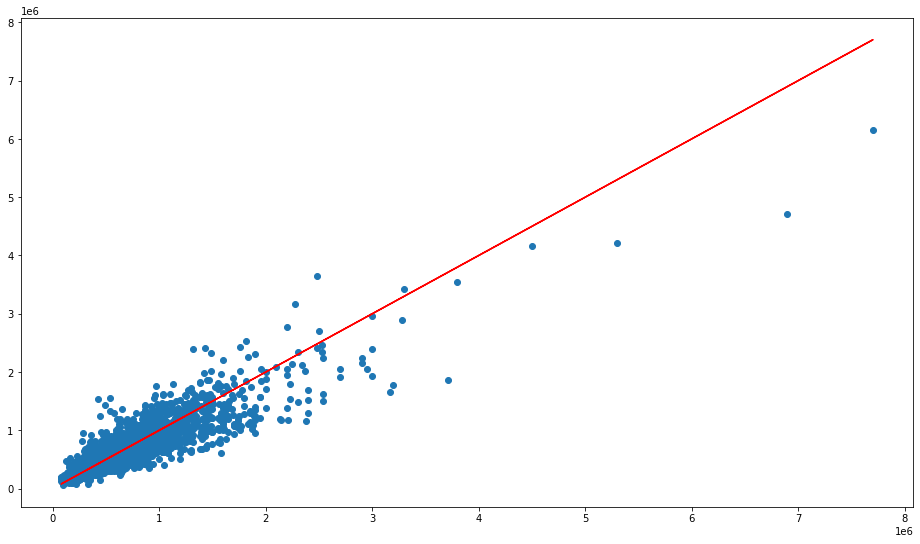

In [59]:
#plotting predictions and real values


plt.figure(figsize=(16,9))
plt.scatter(y_test,pred)
plt.plot(y_test,y_test,'r')

#looks like we should train our model again using 
    #less than 99% of the houses sale prices or try a multidimensional model.

# Calculating a price for a new house

--------------------

In [61]:
new_house = df_99perc.drop('price',axis=1).iloc[0]
new_house = scaler.transform(new_house.values.reshape(-1,19))
model.predict(new_house)

1/1 [==============================] - 0s 56ms/step


array([[280802.2]], dtype=float32)